In [2]:
import sys
sys.path.append(sys.path[0] + "\\..\\scripts")
import importlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import project_functions as pf
importlib.reload(pf)

<module 'project_functions' from 'C:\\Users\\coler\\Desktop\\School\\DATA301\\data301-project\\course-project-group_1032\\analysis\\submitted\\..\\scripts\\project_functions.py'>

# Dataset

In [3]:
sns.set_theme(style="ticks",font_scale=1.2)
df = pf.load_and_process("../../Dataset.csv")


,Year,State,Division,County,Region,Population_Description,Offense,Offender_Race,Offender_Ethnicity,Offender_Age,Offender_Sex,Victim_Type,Location,Weapon,Property_Type,Stolen_Value,Recovered_Value,Recovered?,Recovery_Date
87433,2013,Tennessee,East South Central,PUTNAM,South,"Cities from 25,000 thru 49,999",Theft From Motor Vehicle,NaN,NaN,NaN,NaN,Business,Parking/Drop Lot/Garage,NaN,Clothes/ Furs,1765.0,0.0,N,NaN
82563,2013,Virginia,South Atlantic,HENRY,South,"Non-MSA counties from 25,000 thru 99,999",All Other Larceny,White,NaN,25.0,M,Individual,Service/Gas Station,NaN,Trailers,17500.0,17500.0,Y,03-Apr-13
28695,2013,Michigan,East North Central,WAYNE,Midwest,"Cities from 50,000 thru 99,999",Embezzlement,White,NaN,30.0,M,Business,Highway/Road/Alley/Street/Sidewalk,Firearm (Automatic),Money,49000.0,49000.0,Y,27-Jul-13
28696,2013,Michigan,East North Central,WAYNE,Midwest,"Cities from 50,000 thru 99,999",Embezzlement,White,NaN,31.0,M,Business,Highway/Road/Alley/Street/Sidewalk,Firearm (Automatic),Money,49000.0,49000.0,Y,27-Jul-13
60314,2013,South Carolina,South Atlantic,HORRY,South,"MSA counties 100,000 or over",All Other Larceny,NaN,NaN,NaN,NaN,Business,Specialty Store,NaN,Other,6500.0,0.0,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27083,2019,South Carolina,South Atlantic,DORCHESTER; CHARLESTON,South,"Cities from 100,000 thru 249,999",Motor Vehicle Theft,NaN,NaN,NaN,NaN,Individual,Residence/Home,NaN,Automobile,15000.0,10000.0,Y,18-Jun-19
27084,2019,South Carolina,South Atlantic,DORCHESTER; CHARLESTON,South,"Cities from 100,000 thru 249,999",Motor Vehicle Theft,NaN,NaN,NaN,NaN,Individual,Residence/Home,NaN,Automobile,25000.0,0.0,N,NaN
27089,2019,South Carolina,South Atlantic,SALUDA,South,"MSA counties from 10,000 thru 24,999",Motor Vehicle Theft,NaN,NaN,NaN,NaN,Individual,Field/Woods,NaN,Automobile,4000.0,0.0,N,NaN
27070,2019,North Carolina,South Atlantic,ROBESON,South,"Non-MSA counties from 25,000 thru 99,999",False Pretenses/Swindle/Confidence Game,NaN,NaN,NaN,NaN,Individual,Bank/Savings and Loan,NaN,Money,2000.0,0.0,N,NaN


### Explanation
Our dataset shows crime statistics related to theft in the United States from the years 2013-2019. It includes location data such as State, Division, County, Region, and Population info. It gives information about the offender such as race, ethnicity, age, and sex. It also gives information about the crime such as setting, weapons used, value of goods stolen, and value of recovered goods if there are any. All information is from FBI crime statistics.

---

### One of our main questions was asking which region or specific state has the worst theft?

We will start with a general overview of the data in terms of the broad regions outlines by the figure below provided by the FBI

![Image](../../images/regionsmapFBI.gif)

*Image taken from https://ucr.fbi.gov/crime-in-the-u.s/2011/crime-in-the-u.s.-2011/area-definitions*

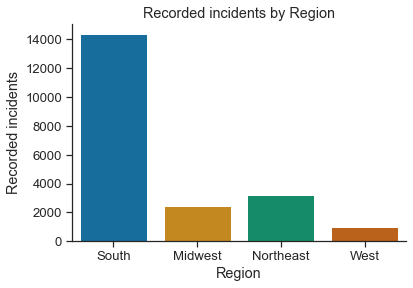

In [36]:
def theft_by_area(dataFrame):
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    theft=sns.countplot(x="Region",data=dataFrame,palette='colorblind')
    sns.despine()
    plt.ylabel("Recorded incidents")
    plt.title("Recorded incidents by Region")
    
theft_by_area(df)



**We see that by far the South region has the most occurances of crime**

If we compare percentage wise we see similar results:

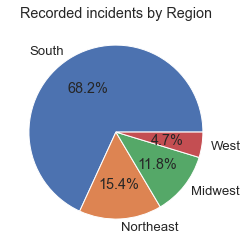

In [37]:
def theft_by_area_pie(dataFrame):
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    pie_graph=plt.pie(dataFrame["Region"].value_counts(),labels=dataFrame["Region"].value_counts().iloc[:4].index,autopct='%1.1f%%')
    plt.title("Recorded incidents by Region")
    
theft_by_area_pie(df)

Which gives us a similar result, early analysis is showing us that the South region has more crime than all the other regions combined!

### Lets take a deeper look into the South Region

In [38]:
df_south=df[df["Region"]=="South"]
states=df_south.State.unique()
for i in range(0,15):
    print("{}  ".format(states[i]))

Tennessee  
Virginia  
South Carolina  
Florida  
West Virginia  
Arkansas  
Delaware  
Mississippi  
Texas  
Oklahoma  
Maryland  
Georgia  
Kentucky  
Alabama  
North Carolina  


So these are the states that are included in the South Region that have reported crime statistics
#### Lets see which states in the South Region are particularily bad 

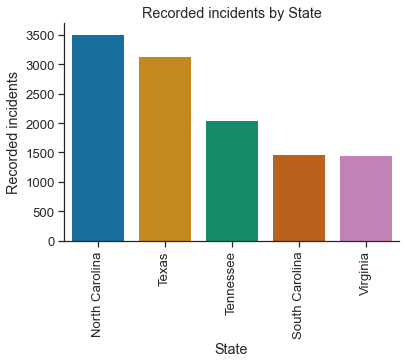

In [41]:
def theft_by_state(dataFrame):
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    theft=sns.countplot(x="State",data=dataFrame,order=dataFrame["State"].value_counts().iloc[:5].index,palette='colorblind')
    sns.despine()
    plt.ylabel("Recorded incidents")
    plt.title("Recorded incidents by State")
    plt.xticks(rotation=90)


theft_by_state(df_south)

### ***Lets see how these 5 shape up nation wide***


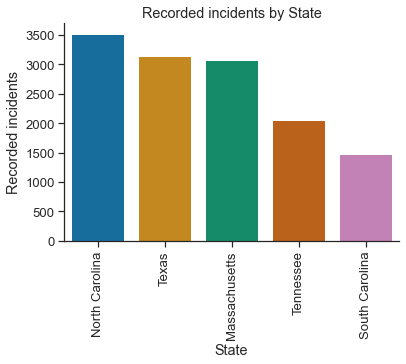

In [42]:
theft_by_state(df)

### So the South region contains 4 of the top 5 most reported incidents by state



**The one expection is Massachusetts which is found in the Northeast Region**

What if we consider the value of goods stolen by Region?

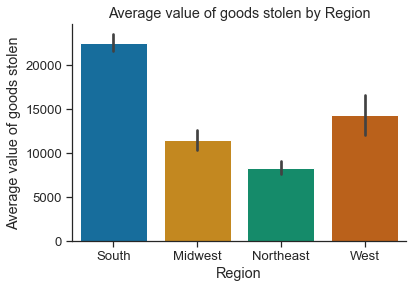

In [45]:
def averages_values_stolen_by_area(dataFrame):
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    aerage_value=sns.barplot(x="Region",y="Stolen_Value",data=dataFrame,palette='colorblind')
    sns.despine()
    plt.ylabel("Average value of goods stolen")
    plt.title("Average value of goods stolen by Region")
    
averages_values_stolen_by_area(df)

Again we see that the South region is be far the worst region for crime, this time with an average value of goods stolen almost double the rest of the regions excluding the West

  
#### This leads us to the conclusion that the South Region is the worst of the defined regions in terms of crime occurance and severity. In particular the states of North Carolina and Texas experience very high rates of reported incidents. 

---
## Another Question we had was what goods are the most frequently stolen?

Lets start by finding the 5 most commonly reported incidences by good type

In [47]:
top_5_stolen=df["Property_Type"].value_counts().iloc[:5].index
print("The top 5 most commonly stolen items are:\n")
for i in range(0,5):
    print("- {}\n".format(top_5_stolen[i]))

The top 5 most commonly stolen items are:

- Automobile

- Other

- Tools

- Money

- Trailers



### How many times were these top 5 items stolen?


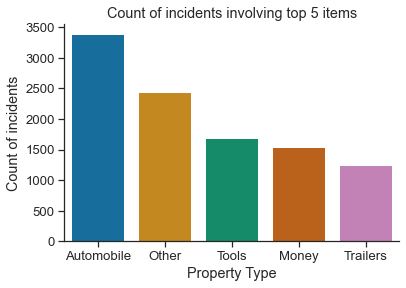

In [68]:
def top_5_stolen(dataframe):
    import matplotlib.pyplot as plt
    import seaborn as sns
    top_5_stolen=dataframe["Property_Type"].value_counts().iloc[:5].index
    top_5=sns.countplot(x="Property_Type",data=dataframe,order=top_5_stolen,palette='colorblind')
    sns.despine()
    plt.ylabel("Count of incidents")
    plt.title("Count of incidents involving top 5 items")
    plt.xlabel("Property Type")
    
top_5_stolen(df)


### Unfortuntaley we do not have any more information on the "Other" category so lets choose to ignore it

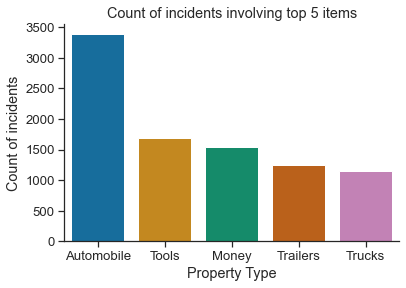

In [69]:
df_sub_other=df[df["Property_Type"]!="Other"]
top_5_stolen(df_sub_other)

On first glance we see that many of these categories involve or are related to vehicles and the automotive  
  
We also see that the Automobile category almost twice as large as the second largest Tools category

#### Lets now look at how these top 5 change by region

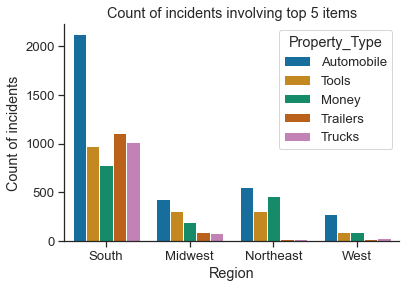

In [53]:
def top_5_stolen_by_region(dataframe):
    import matplotlib.pyplot as plt
    import seaborn as sns
    top_5_stolen=dataframe["Property_Type"].value_counts().iloc[:5].index
    top_5=sns.countplot(x="Region",hue="Property_Type",data=dataframe,hue_order=top_5_stolen,palette='colorblind')
    sns.despine()
    plt.ylabel("Count of incidents")
    plt.title("Count of incidents involving top 5 items")
    
top_5_stolen_by_region(df_sub_other)

A few interesting trends are seen here:
>-Money theft appears to be more prevalent in the Northeast compared to other regions  
>-The South region is unique in that it's Money theft counts are the lowest of the top 5, with other states having this value be second or third  
>-Also in the South, Trailer and Truck theft are both second and third highest respectively, while in other Regions these are almost equally as common but rank fourth or fifth

#### With this analysis in mind, we can conclude that the Automobile category seems to uniformly be the most frequently reported theft. If we consider vehicles in general by also including Trailers and Trucks, our conclusion is that theft pertaining to the automotive industry is most frequently stolen.

---

These results lead us to start to think about what the likelyhood is that the good that were stolen end up being recovered either partially or fully. So we considered:

### *What is the average chance that stolen goods are recovered and what is the percentage of value recovered?*

With this in mind we started to do some analysis by region on the rates of recovery

In [57]:
df['Recovery_Percentage'] = df['Recovered_Value'] / df['Stolen_Value'] * 100

southDf = df.loc[df['Region'] == 'South']
northeastDf = df.loc[df['Region'] == 'Northeast']
midwestDf = df.loc[df['Region'] == 'Midwest']
westDf = df.loc[df['Region'] == 'West']

dfRecovered = df.loc[df['Recovered?'] == 'Y']
dfRecovered = dfRecovered.reset_index().drop(columns=['index'])

southDfRecovered = dfRecovered.loc[dfRecovered['Region'] == 'South']
northeastDfRecovered = dfRecovered.loc[dfRecovered['Region'] == 'Northeast']
midwestDfRecovered = dfRecovered.loc[dfRecovered['Region'] == 'Midwest']
westDfRecovered = dfRecovered.loc[dfRecovered['Region'] == 'West']

Recovery% South: 27.23%
Recovery% Northeast: 13.29%
Recovery% Midwest: 21.16%
Recovery% West: 29.54%
Recovery% Nationally: 24.48%


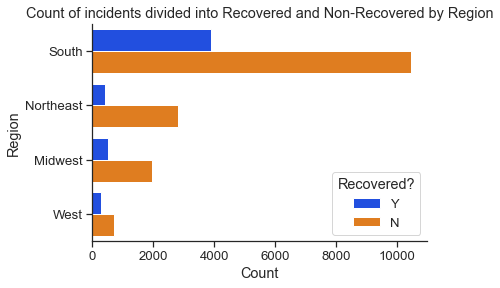

In [70]:
plot = sns.countplot(y="Region", data=df, hue="Recovered?", order=df['Region'].value_counts().index[:], hue_order=["Y", "N"], palette='bright')
sns.despine()
plt.title("Count of incidents divided into Recovered and Non-Recovered by Region")
plt.xlabel("Count")

southRecoverRate = southDf['Recovered?'].value_counts()
southRecoverRate = southRecoverRate['Y'] / (southDf['Recovered?'].count())

southRecoverRate = southDf['Recovered?'].value_counts()['Y'] / southDf['Recovered?'].count() * 100
northeastRecoverRate = northeastDf['Recovered?'].value_counts()['Y'] / northeastDf['Recovered?'].count() * 100
midwestRecoverRate = midwestDf['Recovered?'].value_counts()['Y'] / midwestDf['Recovered?'].count() * 100
westRecoverRate = westDf['Recovered?'].value_counts()['Y'] / westDf['Recovered?'].count() * 100

nationalRecoverRate = df['Recovered?'].value_counts()['Y']/df['Recovered?'].count()*100

print("Recovery% South: " + str(round(southRecoverRate, 2)) + "%")
print("Recovery% Northeast: " + str(round(northeastRecoverRate, 2)) + "%")
print("Recovery% Midwest: " + str(round(midwestRecoverRate, 2)) + "%")
print("Recovery% West: " + str(round(westRecoverRate, 2)) + "%")

print("Recovery% Nationally: " + str(round(nationalRecoverRate, 2)) + "%")

**We can see that the South and West regions are much better at recovering stolen goods. Also the Northeast region has a very low recovery rate, around half of the national average.**

With these recovery rates in mind, we set out to analyze the rate of return on goods that are recovered.

In [60]:
valueStolen = dfRecovered['Stolen_Value'].sum()
valueRecovered = dfRecovered['Recovered_Value'].sum()
recoveryRate = valueRecovered / valueStolen * 100

print("\nOn items that are recovered, the average value of the recovered stuff is " + str(round(recoveryRate, 2)) + "% of the value of the stolen goods.\n")


On items that are recovered, the average value of the recovered stuff is 82.99% of the value of the stolen goods.



Breaking this information down by region we see:

In [62]:
valueStolenSouth = southDfRecovered['Stolen_Value'].sum()
valueRecoveredSouth = southDfRecovered['Recovered_Value'].sum()
recoveryRateSouth = valueRecoveredSouth / valueStolenSouth * 100

valueStolenNortheast = northeastDfRecovered['Stolen_Value'].sum()
valueRecoveredNortheast = northeastDfRecovered['Recovered_Value'].sum()
recoveryRateNortheast = valueRecoveredNortheast / valueStolenNortheast * 100

valueStolenMidwest = midwestDfRecovered['Stolen_Value'].sum()
valueRecoveredMidwest = midwestDfRecovered['Recovered_Value'].sum()
recoveryRateMidwest = valueRecoveredMidwest / valueStolenMidwest * 100

valueStolenWest = westDfRecovered['Stolen_Value'].sum()
valueRecoveredWest = westDfRecovered['Recovered_Value'].sum()
recoveryRateWest = valueRecoveredWest / valueStolenWest * 100

print("On recovered items in the South region, the average value of the recovered stuff is " + str(round(recoveryRateSouth, 2)) + "% of the value of the stolen goods.")
print("On recovered items in the Northeast region, the average value of the recovered stuff is " + str(round(recoveryRateNortheast, 2)) + "% of the value of the stolen goods.")
print("On recovered items in the Midwest region, the average value of the recovered stuff is " + str(round(recoveryRateMidwest, 2)) + "% of the value of the stolen goods.")
print("On recovered items in the West region, the average value of the recovered stuff is " + str(round(recoveryRateWest, 2)) + "% of the value of the stolen goods.")

On recovered items in the South region, the average value of the recovered stuff is 81.88% of the value of the stolen goods.
On recovered items in the Northeast region, the average value of the recovered stuff is 82.71% of the value of the stolen goods.
On recovered items in the Midwest region, the average value of the recovered stuff is 94.13% of the value of the stolen goods.
On recovered items in the West region, the average value of the recovered stuff is 92.04% of the value of the stolen goods.


**So again we see the Northeast region performs poorly in this statistic. Here through, the South is also not as effective in returning all the goods compared to the West or the Midwest**

### Therefore, we conclude by evaluating the percentage of recovery and the amount of value recovered versus lost, that the Northeast region performs the poorest in recovering stolen goods. Also, we found that the national average recovery rate of 24.48% was suprisingly low based on our initial expectations
---

### What years were particularly bad for crime?

In [3]:
sns.set_theme(style="ticks",font_scale=1.2)
df = pf.load_and_process("../../Dataset.csv")
df

,Year,State,Division,County,Region,Population_Description,Offense,Offender_Race,Offender_Ethnicity,Offender_Age,Offender_Sex,Victim_Type,Location,Weapon,Property_Type,Stolen_Value,Recovered_Value,Recovered?,Recovery_Date
87433,2013,Tennessee,East South Central,PUTNAM,South,"Cities from 25,000 thru 49,999",Theft From Motor Vehicle,NaN,NaN,NaN,NaN,Business,Parking/Drop Lot/Garage,NaN,Clothes/ Furs,1765.0,0.0,N,NaN
82563,2013,Virginia,South Atlantic,HENRY,South,"Non-MSA counties from 25,000 thru 99,999",All Other Larceny,White,NaN,25.0,M,Individual,Service/Gas Station,NaN,Trailers,17500.0,17500.0,Y,03-Apr-13
28695,2013,Michigan,East North Central,WAYNE,Midwest,"Cities from 50,000 thru 99,999",Embezzlement,White,NaN,30.0,M,Business,Highway/Road/Alley/Street/Sidewalk,Firearm (Automatic),Money,49000.0,49000.0,Y,27-Jul-13
28696,2013,Michigan,East North Central,WAYNE,Midwest,"Cities from 50,000 thru 99,999",Embezzlement,White,NaN,31.0,M,Business,Highway/Road/Alley/Street/Sidewalk,Firearm (Automatic),Money,49000.0,49000.0,Y,27-Jul-13
60314,2013,South Carolina,South Atlantic,HORRY,South,"MSA counties 100,000 or over",All Other Larceny,NaN,NaN,NaN,NaN,Business,Specialty Store,NaN,Other,6500.0,0.0,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27083,2019,South Carolina,South Atlantic,DORCHESTER; CHARLESTON,South,"Cities from 100,000 thru 249,999",Motor Vehicle Theft,NaN,NaN,NaN,NaN,Individual,Residence/Home,NaN,Automobile,15000.0,10000.0,Y,18-Jun-19
27084,2019,South Carolina,South Atlantic,DORCHESTER; CHARLESTON,South,"Cities from 100,000 thru 249,999",Motor Vehicle Theft,NaN,NaN,NaN,NaN,Individual,Residence/Home,NaN,Automobile,25000.0,0.0,N,NaN
27089,2019,South Carolina,South Atlantic,SALUDA,South,"MSA counties from 10,000 thru 24,999",Motor Vehicle Theft,NaN,NaN,NaN,NaN,Individual,Field/Woods,NaN,Automobile,4000.0,0.0,N,NaN
27070,2019,North Carolina,South Atlantic,ROBESON,South,"Non-MSA counties from 25,000 thru 99,999",False Pretenses/Swindle/Confidence Game,NaN,NaN,NaN,NaN,Individual,Bank/Savings and Loan,NaN,Money,2000.0,0.0,N,NaN


We can see that 2019 was a particularly bad year for the South and West regions,
while crime was much higher in the Northeast and Midwest regions in 2016.
It is also noteworthy that despite having the lowest incident rate overall, the West region is second highest in 2019.


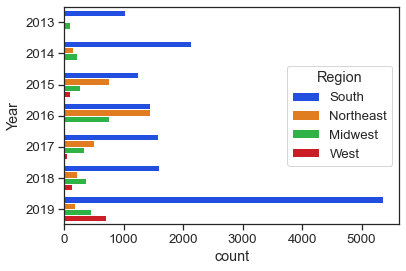

In [14]:
plot = sns.countplot(y="Year", data=df, hue="Region", hue_order=df['Region'].value_counts().index[:], palette='bright')
print("We can see that 2019 was a particularly bad year for the South and West regions,\nwhile crime was much higher in the Northeast and Midwest regions in 2016.")
print("It is also noteworthy that despite having the lowest incident rate overall, the West region is second highest in 2019.")

In [4]:
df2013 = df.loc[df['Year'] == 2013]
df2014 = df.loc[df['Year'] == 2014]
df2015 = df.loc[df['Year'] == 2015]
df2016 = df.loc[df['Year'] == 2016]
df2017 = df.loc[df['Year'] == 2017]
df2018 = df.loc[df['Year'] == 2018]
df2019 = df.loc[df['Year'] == 2019]

2013 has no data for the West region.


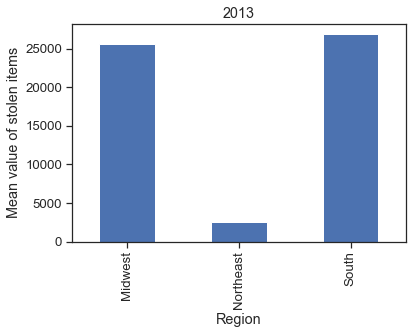

In [50]:
df2013.groupby('Region')['Stolen_Value'].mean().plot(kind='bar', ylabel='Mean value of stolen items', title='2013')
print("2013 has no data for the West region.")

<AxesSubplot:title={'center':'2014'}, xlabel='Region', ylabel='Mean value of stolen items'>

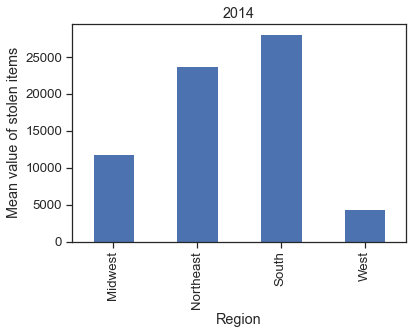

In [51]:
df2014.groupby('Region')['Stolen_Value'].mean().plot(kind='bar', ylabel='Mean value of stolen items', title='2014')

<AxesSubplot:title={'center':'2015'}, xlabel='Region', ylabel='Mean value of stolen items'>

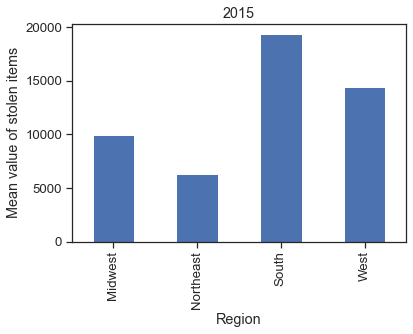

In [52]:
df2015.groupby('Region')['Stolen_Value'].mean().plot(kind='bar', ylabel='Mean value of stolen items', title='2015')

<AxesSubplot:title={'center':'2016'}, xlabel='Region', ylabel='Mean value of stolen items'>

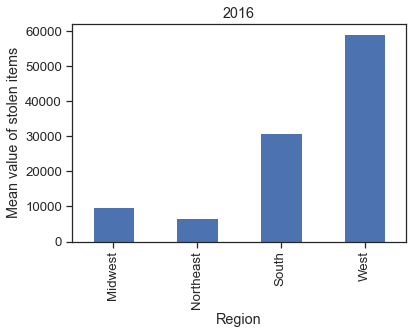

In [53]:
df2016.groupby('Region')['Stolen_Value'].mean().plot(kind='bar', ylabel='Mean value of stolen items', title='2016')

<AxesSubplot:title={'center':'2017'}, xlabel='Region', ylabel='Mean value of stolen items'>

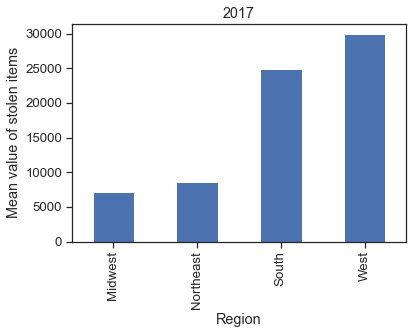

In [54]:
df2017.groupby('Region')['Stolen_Value'].mean().plot(kind='bar', ylabel='Mean value of stolen items', title='2017')

<AxesSubplot:title={'center':'2018'}, xlabel='Region', ylabel='Mean value of stolen items'>

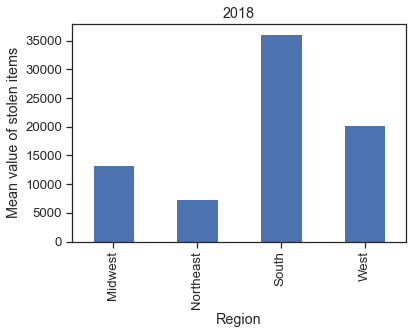

In [55]:
df2018.groupby('Region')['Stolen_Value'].mean().plot(kind='bar', ylabel='Mean value of stolen items', title='2018')

<AxesSubplot:title={'center':'2019'}, xlabel='Region', ylabel='Mean value of stolen items'>

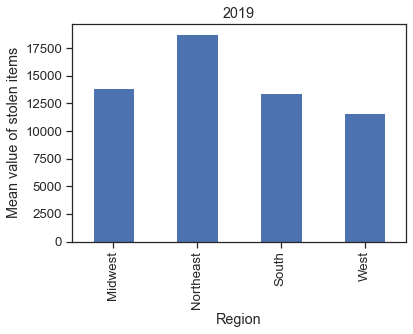

In [56]:
df2019.groupby('Region')['Stolen_Value'].mean().plot(kind='bar', ylabel='Mean value of stolen items', title='2019')

Analyzing the above plots, it is hard to say whether the up and down swings of average stolen value per region are actually meaningful.
There is a possibility that high mean values simply indicate that there were a few crimes commited that are outliers, skewing the value upwards.

### We can conclude that 2016 and 2019 were bad years, but for different regions. 2019 was especially bad for the South region, while 2016 was much worse than average for the Northeast region. On top of that, 2016 had very high average stolen values, particularly in the West.

---